In [1]:
from sklearn.metrics import cohen_kappa_score
from krippendorff import krippendorff_alpha
import pandas as pd
import numpy

In [18]:
data = pd.read_csv("adverb_os_llm.csv")

In [19]:
data.head()

,adverb,cluster,sentence,jooyoung,Column 1,jader,Column 1.1,match?,Column 2,type
0,arrogantly,0,maybe <t>arrogantly</t> is a better word.,NaN,NaN,NaN,?,NaN,Answer: adverb.manner,adverb.manner
1,arrogantly,1,"if you have three steps to do, and you take th...",manner,NaN,manner,NaN,NaN,Answer: adverb.manner,adverb.manner
2,arrogantly,2,that is so <t>arrogantly</t> phallic!,degree,?,manner,NaN,*,Answer: adverb.manner,adverb.manner
3,boldly,0,"its continuing mission, to explore strange new...",manner,NaN,manner,NaN,NaN,Answer: adverb.manner,adverb.manner
4,boldly,1,"the swimming-pool, <t>boldly</t> projected in ...",manner,NaN,manner,NaN,NaN,Answer: adverb.manner,adverb.manner


In [20]:
data["llm"] = data["type"].str.lstrip("adverb.")

In [21]:
data.head()

,adverb,cluster,sentence,jooyoung,Column 1,jader,Column 1.1,match?,Column 2,type,llm
0,arrogantly,0,maybe <t>arrogantly</t> is a better word.,NaN,NaN,NaN,?,NaN,Answer: adverb.manner,adverb.manner,manner
1,arrogantly,1,"if you have three steps to do, and you take th...",manner,NaN,manner,NaN,NaN,Answer: adverb.manner,adverb.manner,manner
2,arrogantly,2,that is so <t>arrogantly</t> phallic!,degree,?,manner,NaN,*,Answer: adverb.manner,adverb.manner,manner
3,boldly,0,"its continuing mission, to explore strange new...",manner,NaN,manner,NaN,NaN,Answer: adverb.manner,adverb.manner,manner
4,boldly,1,"the swimming-pool, <t>boldly</t> projected in ...",manner,NaN,manner,NaN,NaN,Answer: adverb.manner,adverb.manner,manner


In [22]:
df = data[["jooyoung", "jader", "llm"]].dropna()

In [23]:
kappa = cohen_kappa_score(df["jooyoung"], df["llm"])
print("Cohen's kappa:", kappa)

Cohen's kappa: 0.3995643445948831


In [24]:
kappa = cohen_kappa_score(df["jader"], df["llm"])
print("Cohen's kappa:", kappa)

Cohen's kappa: 0.3813545009288972


In [25]:
kappa = cohen_kappa_score(df["jooyoung"], df["jader"])
print("Cohen's kappa:", kappa)

Cohen's kappa: 0.6230575109576305


<Figure size 1300x2500 with 0 Axes>

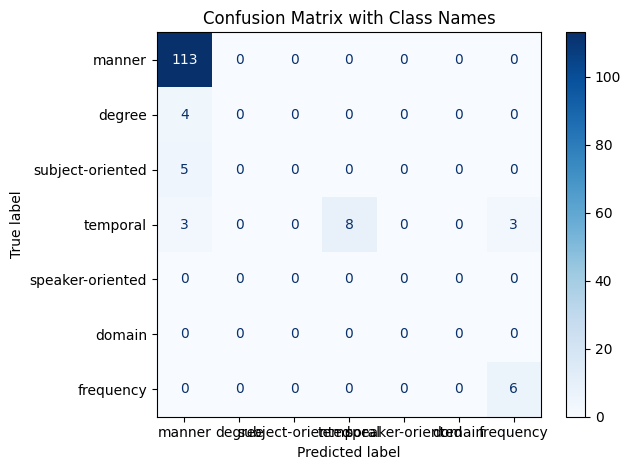

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = df["jooyoung"].unique()
# Compute confusion matrix
cm = confusion_matrix(df["jooyoung"], df["llm"], labels=labels)

# Plot confusion matrix

plt.figure(figsize=(13,25))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix with Class Names")
plt.tight_layout()
plt.savefig("cm.png")

In [11]:
df = pd.read_csv("adverb_llm.csv")

In [12]:
df.head()

,Unnamed: 0,adverb,cluster,sentence,entropy,type
0,0,abjectly,0,You have gone and abjectly appealed...,1.779239e-02,adverb.manner
1,1,ably,0,"and as the President of Chile, I shall carry o...",3.071035e-08,adverb.manner
2,2,ably,1,"Every time he was irrefutably proved wrong, it...",2.203620e-09,adverb.manner
3,3,ably,2,I want you to be able to talk about their defe...,8.500102e-04,adverb.manner
4,4,ably,4,My brother has a mystical torture device burie...,2.089519e-08,adverb.manner


In [13]:
df = df[df.type != "adverb.manner"].groupby(["adverb", "type"]).first().reset_index()

In [14]:
df.head()

,adverb,type,Unnamed: 0,cluster,sentence,entropy
0,ably,adverb.degree,6,8,Or are you implacably opposed to giving anyone...,1.712110e-06
1,absolutely,adverb.degree,16,0,"Absolutely right! Fuck destiny, fate. All meta...",1.084782e-08
2,abstractly,adverb.domain,17,0,"Abstractly, I knew it could happen.",6.242872e-04
3,absurdly,adverb.degree,18,0,Absurdly basic neuro-linguistic programming te...,6.596674e-07
4,abundantly,adverb.degree,19,1,Abundantly strong enough for just about any st...,2.370524e-04


In [15]:
df.to_csv("adverb_remove.csv")